In [1]:
ls

LICENSE         README.md       cereeberus/     docs/           pyproject.toml
Makefile        Untitled.ipynb  doc_source/     notebooks/      venv/


In [2]:
pip install .

Processing /Users/daniellebarnes/development/ceREEBerus
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cereeberus: filename=cereeberus-0.0.5-py3-none-any.whl size=14920 sha256=d81bc036774343e17384c9c379baac66f465cb20bd522011ba5aff3a6e6007a3
  Stored in directory: /private/var/folders/3v/dt2bhl_176dcpzjx5gld8qdc0000gn/T/pip-ephem-wheel-cache-la02jvnr/wheels/ba/0b/08/8340df22f780a7a3281c7f7e134235d0cced784225c7bf2d6f
Successfully built cereeberus
  Attempting uninstall: cereeberus
    Found existing installation: cereeberus 0.0.5
    Uninstalling cereeberus-0.0.5:
      Successfully uninstalled cereeberus-0.0.5
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Basic imports 
import networkx as nx
import matplotlib

# Examples of Up Down Degree Computation

In the dancing man graph below, we compute the up and down degree and test the function is correct

In [4]:
from cereeberus.reeb import Reeb
from cereeberus.data import graphs

In [13]:
Gf = graphs.favorite_0()
position = nx.get_node_attributes(Gf,'pos')

In [14]:
rf = Reeb(Gf)

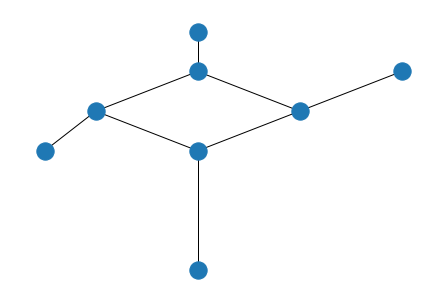

In [15]:
rf.plot_reeb(position)

In [18]:
up = nx.get_node_attributes(Gf,'up_deg')
down = nx.get_node_attributes(Gf,'down_deg')
up

{0: 1, 1: 2, 2: 2, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0}

In [19]:
down

{0: 1, 1: 2, 2: 2, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0}

In [35]:
import numpy as np
Gf.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (2, 5), (2, 6), (3, 4), (3, 6), (6, 7)])

In [79]:
fx = nx.get_node_attributes(Gf,'fx')
fx

{0: 7, 1: 6, 2: 5, 3: 5, 4: 6, 5: 4, 6: 4, 7: 1}

In [106]:
n = len(down)
down_adj = np.zeros((n,n))
down_adj

for i in range(0,n):
    for j in range(i,n):
        if fx[i] > fx[j]:
            e = list(Gf.edges(i))
            if (i,j) in e:
                down_adj[j,i]+=1
        if fx[i] < fx[j]:
            e = list(Gf.edges(i))
            if (i,j) in e:
                down_adj[i,j]+=1

d = sum(down_adj)

down = {}
for i in range(0,n):
    down[i] = int(d[i])

In [109]:
n = len(up)
up_adj = np.zeros((n,n))
up_adj

for i in range(0,n):
    for j in range(i,n):
        if fx[i] < fx[j]:
            e = list(Gf.edges(i))
            if (i,j) in e:
                up_adj[j,i]+=1
        if fx[i] > fx[j]:
            e = list(Gf.edges(i))
            if (i,j) in e:
                up_adj[i,j]+=1

d = sum(up_adj)

up = {}
for i in range(0,n):
    up[i] = int(d[i])

In [110]:

up

{0: 0, 1: 1, 2: 1, 3: 2, 4: 0, 5: 1, 6: 2, 7: 1}

In [113]:
len(Gf.nodes)

8

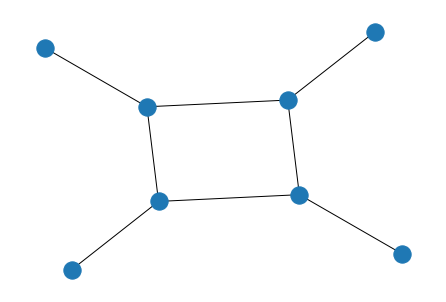

In [41]:
nx.draw(Gf)